## Technical Challenge DA✅

Emojis: ✅⚠️⁉️➡️▶️⏸️🟡🔴🥳👀🙌🏻🚀🤯

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics


from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from PIL import Image
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##############################################
from sklearn.linear_model import LogisticRegression




%matplotlib inline

### You should aim for:
Exploratory data analysis

Get to know the domain

Explore your data

Clean your data

Take a look and find connections between data

In [4]:
df = pd.read_csv("measurements.csv")

In [5]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### Second Data Frame

In [34]:
df01 = pd.read_excel("measurements2.xlsx")

In [33]:
df01 

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


# ⚠️STAGE 01

### Exploratory data analysis / Cleanning data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [16]:
column_value_counts = df.count()

### ➡️ Converting object values into numerical values

In [39]:
columns_to_convert = ["distance", "consume","temp_inside"]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       52 non-null     float64
 1   consume        49 non-null     float64
 2   speed          388 non-null    int64  
 3   temp_inside    169 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [17]:
column_value_counts

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

### ➡️  Removing columns with more thant 70% of Null values

In [35]:
columns_to_delete = ["specials", "refill liters", "refill gas"]
df = df.drop(columns=columns_to_delete)

In [21]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,NaN,12,E10,0,0,0
1,12.0,NaN,30,NaN,13,E10,0,0,0
2,NaN,NaN,38,NaN,15,E10,0,0,0
3,NaN,NaN,36,NaN,14,E10,0,0,0
4,NaN,NaN,46,NaN,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,NaN,39,NaN,18,SP98,0,0,0
384,NaN,NaN,38,25.0,31,SP98,1,0,0
385,16.0,NaN,45,25.0,19,SP98,0,0,0
386,NaN,NaN,42,25.0,31,SP98,1,0,0


In [40]:
column_means = df.mean()

df.fillna(column_means, inplace=True)



C:\Users\espan\AppData\Local\Temp\ipykernel_26124\2884763422.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  column_means = df.mean()


In [41]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


### ➡️  Counting Values

In [42]:
 df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [43]:
 df['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [44]:
 df['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [45]:
 df['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

In [46]:
 df['distance'].value_counts()

11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64

In [48]:
column_value_counts

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


# ⚠️STAGE 02

## Preparing our data for our Linear Regression Model👀

### ➡️Splitting up our data into numerical and categorical

In [50]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [51]:
numerical_df = numerical_df.reset_index(drop=True) 

In [52]:
numerical_df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


### To be able to check the correlation of our variable we are goint to plot the Hitmap

In [56]:
corr= numerical_df.loc[:,['distance','speed', 'temp_inside',"temp_outside"]].corr()

<AxesSubplot:>

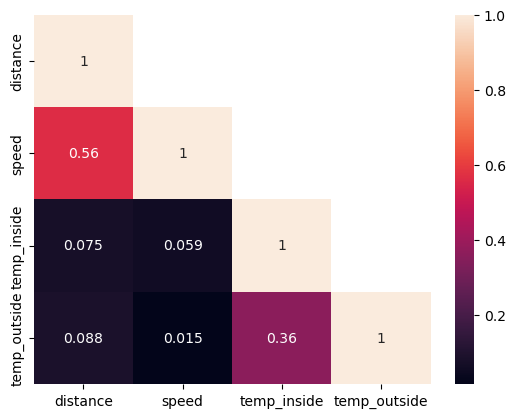

In [57]:
matrix = np.triu(corr)
np.fill_diagonal(matrix,False)
sns.heatmap(corr, annot=True, mask=matrix)

### ✅*Conclusion*: we do not need to drop any independent variable because these do not have a high correlation between them

In [58]:
categorical_df

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


### ➡️ Our variable "gas_type" is Nominal ( not Hierarque)
We can use dummys to do the transformation.

In [59]:
dummy_nominals = ["gas_type"]
categorical_df = pd.get_dummies(categorical_df, columns=dummy_nominals)

In [60]:
categorical_df 

,gas_type_E10,gas_type_SP98
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
383,0,1
384,0,1
385,0,1
386,0,1


### ➡️ Concatenating our data

In [61]:
df_model = pd.concat([numerical_df, categorical_df], axis=1)

In [62]:
df_model 

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0,1


### ➡️ Splitting the data into independent variables and dependent variable

In [67]:
X=df_model[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'gas_type_E10','gas_type_SP98']]
y=df_model['consume']

### ➡️ Splitting the data into training data and testing data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## ⚠️ **Checklist**

1.Tranform our scales using min and max✅

2.To apply the linear regression✅

3.Getting the predictions✅

4.Evaluate the Model✅

5.Classification Report✅

6.Confussion Matriz✅

In [86]:
#1


scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaler_train= scaler.transform(X_train)
X_scaler_test= scaler.transform(X_test)

#2

model_lr = LinearRegression()
model_lr.fit(X_scaler_train, y_train)

#3

y_predictive = model_lr.predict(X_scaler_test)



In [87]:
# 4
mse = mean_squared_error(y_test, y_predictive)
r2 = r2_score(y_test, y_predictive)

In [84]:
mse

0.7476946880297473

In [85]:
r2

0.10721484320604513

### ➡️  Coefficients Analysis

In [88]:
coefficients = model_lr.coef_

In [89]:
coefficients 

array([ 1.10635062, -1.8328791 , -0.97811411, -1.27088045,  0.42096231,
        0.62794039, -0.06115135,  0.04191564, -0.04191564])

In [90]:
a={"independent variables" : ['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'gas_type_E10','gas_type_SP98'],
   'coefficients':[1.10635062,  -1.8328791,  -0.97811411,  -1.2708804, 0.42096231,
         0.62794039, -0.06115135,  0.04191564,  -0.04191564]}

In [91]:
coefficients_analysis = pd.DataFrame(a)

In [92]:
coefficients_analysis

,independent variables,coefficients
0,distance,1.106351
1,speed,-1.832879
2,temp_inside,-0.978114
3,temp_outside,-1.270880
4,AC,0.420962
5,rain,0.627940
6,sun,-0.061151
7,gas_type_E10,0.041916
8,gas_type_SP98,-0.041916


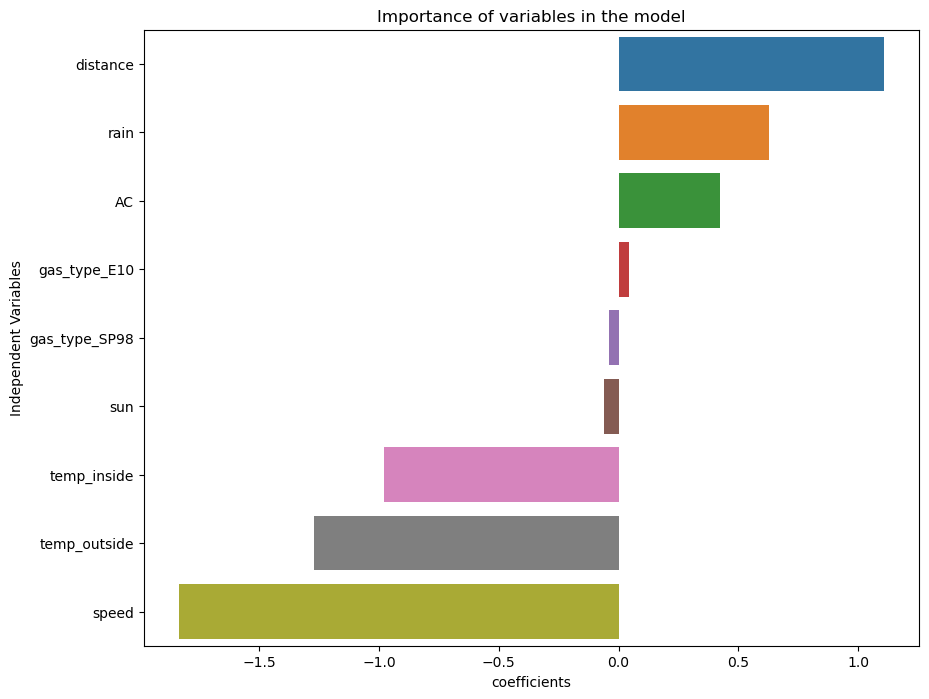

In [93]:
df_orden_importances = coefficients_analysis.sort_values(by='coefficients', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficients', y='independent variables', data=df_orden_importances)
plt.xlabel('coefficients')
plt.ylabel('Independent Variables')
plt.title('Importance of variables in the model')

# Mostrar el gráfico
plt.show()

# ⚠️STAGE 03

## Preparing our data for our Logistic Regression Model👀

In [94]:
categorical_df_lr = df.select_dtypes(include=['object'])

In [95]:
categorical_df_lr

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


In [96]:
df_model_lr = pd.concat([numerical_df, categorical_df_lr], axis=1)

In [97]:
df_model_lr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type
0,28.0,5.0,26,21.5,12,0,0,0,E10
1,12.0,4.2,30,21.5,13,0,0,0,E10
2,11.2,5.5,38,21.5,15,0,0,0,E10
3,12.9,3.9,36,21.5,14,0,0,0,E10
4,18.5,4.5,46,21.5,15,0,0,0,E10
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,SP98
384,16.1,4.3,38,25.0,31,1,0,0,SP98
385,16.0,3.8,45,25.0,19,0,0,0,SP98
386,15.4,4.6,42,25.0,31,1,0,0,SP98


In [102]:
X_lr=df_model_lr[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun','consume']]
y_lr=df_model_lr['gas_type']

In [103]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X,y, test_size = 0.3, random_state = 42)

## ⚠️ Let's check what happend with our linear regression before get a balance in our data

In [104]:
#1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_lr)
X_scaler_train_lr= scaler.transform(X_train_lr)

X_scaler_test_lr= scaler.transform(X_test_lr)

#2

model_unbalenced = LogisticRegression()
model_unbalenced.fit(X_scaler_train_lr, y_train_lr)

#3

y_predictive_lr = model_unbalenced.predict(X_scaler_test_lr)

#4

accuracy = accuracy_score(y_test_lr, y_predictive_lr)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 55.56%
